In [94]:
import cv2
from ultralytics import YOLO
import numpy
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
img_path = '../images/hornet.jpg'

In [3]:
img_cv = cv2.imread(img_path)

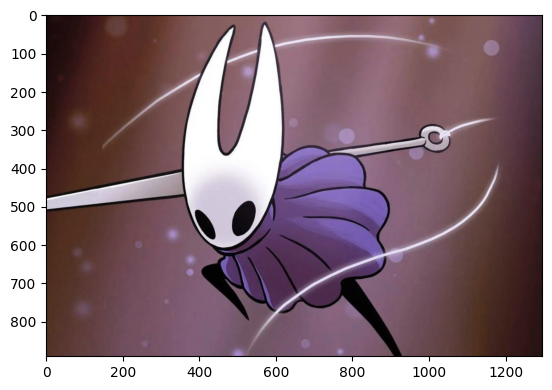

In [5]:
plt.imshow(img_cv)
plt.show()

In [11]:
model = YOLO('yolov8n-seg.pt')

In [13]:
result = model(img_cv)


0: 448x640 1 surfboard, 60.2ms
Speed: 4.0ms preprocess, 60.2ms inference, 26.1ms postprocess per image at shape (1, 3, 448, 640)


In [21]:
type(result[0])

ultralytics.engine.results.Results

In [31]:
len(result)

1

In [32]:
masks = result[0].masks

In [36]:
mask = masks.data[0].cpu().numpy()

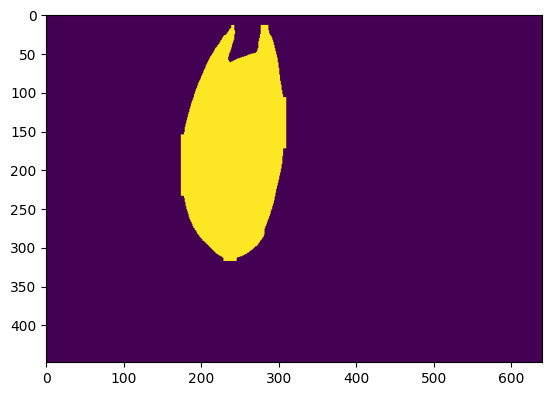

In [37]:
plt.imshow(mask)
plt.show()

In [47]:
lab = cv2.cvtColor(img_cv, cv2.COLOR_BGR2LAB)

In [69]:
l, a, b = cv2.split(lab)

In [135]:
clahe = cv2.createCLAHE(2.5, (8,8))

In [136]:
l2 = clahe.apply(l)

In [137]:
merged = cv2.merge((l2,a,b))

In [138]:
enhanced = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)

In [139]:
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

In [141]:
enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_RGB2BGR)

In [142]:
resutl = model(enhanced_bgr)


0: 448x640 (no detections), 6.5ms
Speed: 14.1ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


In [143]:
masks = result[0].masks

In [193]:
mask = masks.data[0].cpu().numpy()

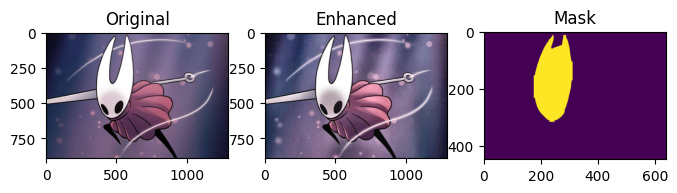

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(8,4))
axes[0].imshow(img_cv_rgb)
axes[0].set_title('Original')

axes[1].imshow(enhanced)
axes[1].set_title('Enhanced')

axes[2].imshow(mask)
axes[2].set_title('Mask')

plt.show()

In [155]:
img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

In [266]:
edges = cv2.Canny(
    img_gray, 50, 150
)

num_iter = 10
img_gray_dil = cv2.dilate(img_gray, None, iterations= num_iter)
img_gray_ero = cv2.erode(img_gray, None, iterations= num_iter)

edges = cv2.Canny(
    img_gray, 50, 150
)

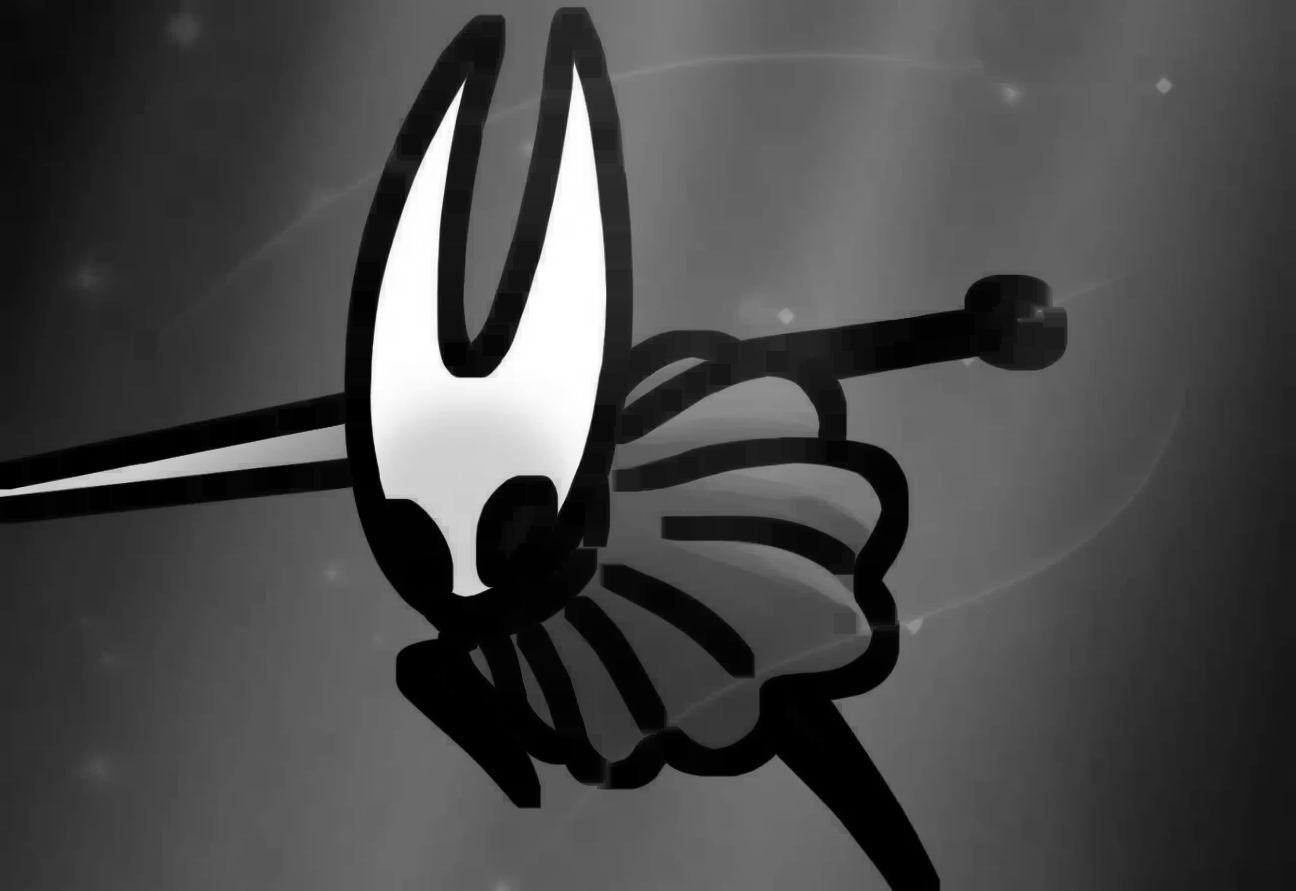

In [267]:
Image.fromarray(img_gray_ero)

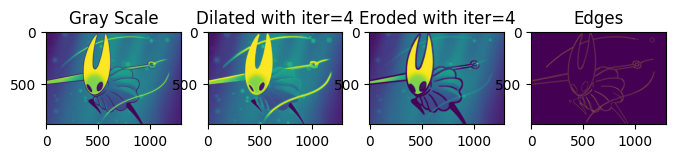

In [189]:
fig, axes = plt.subplots(1,4,figsize=(8,4))

axes[0].imshow(img_gray)
axes[0].set_title('Gray Scale')

axes[1].imshow(img_gray_dil)
axes[1].set_title(f'Dilated with iter={num_iter}')

axes[2].imshow(img_gray_ero)
axes[2].set_title(f'Eroded with iter={num_iter}')

axes[3].imshow(edges * 255)
axes[3].set_title(f'Edges')


plt.show()

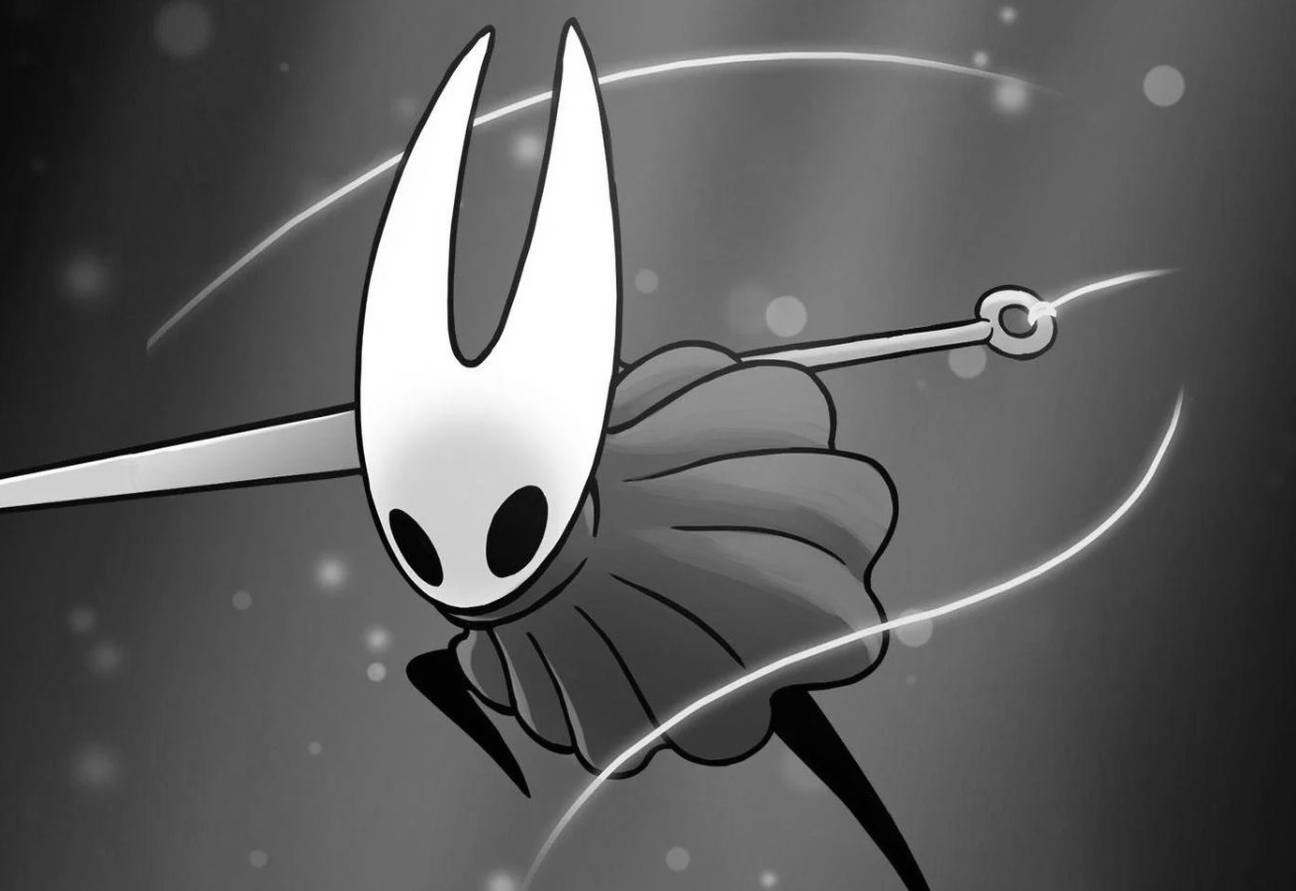

In [285]:
Image.fromarray(img_gray)

In [191]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(448, 640), dtype=uint8)

In [192]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(891, 1296), dtype=uint8)

In [245]:
mask_bin = (mask > 0).astype('uint8') * 255

In [246]:
edges_bin = (edges > 0).astype('uint8') * 255

In [260]:
h, w = edges_bin.shape

In [261]:
mask_resize = cv2.resize(mask_bin, (w, h), interpolation=cv2.INTER_NEAREST)

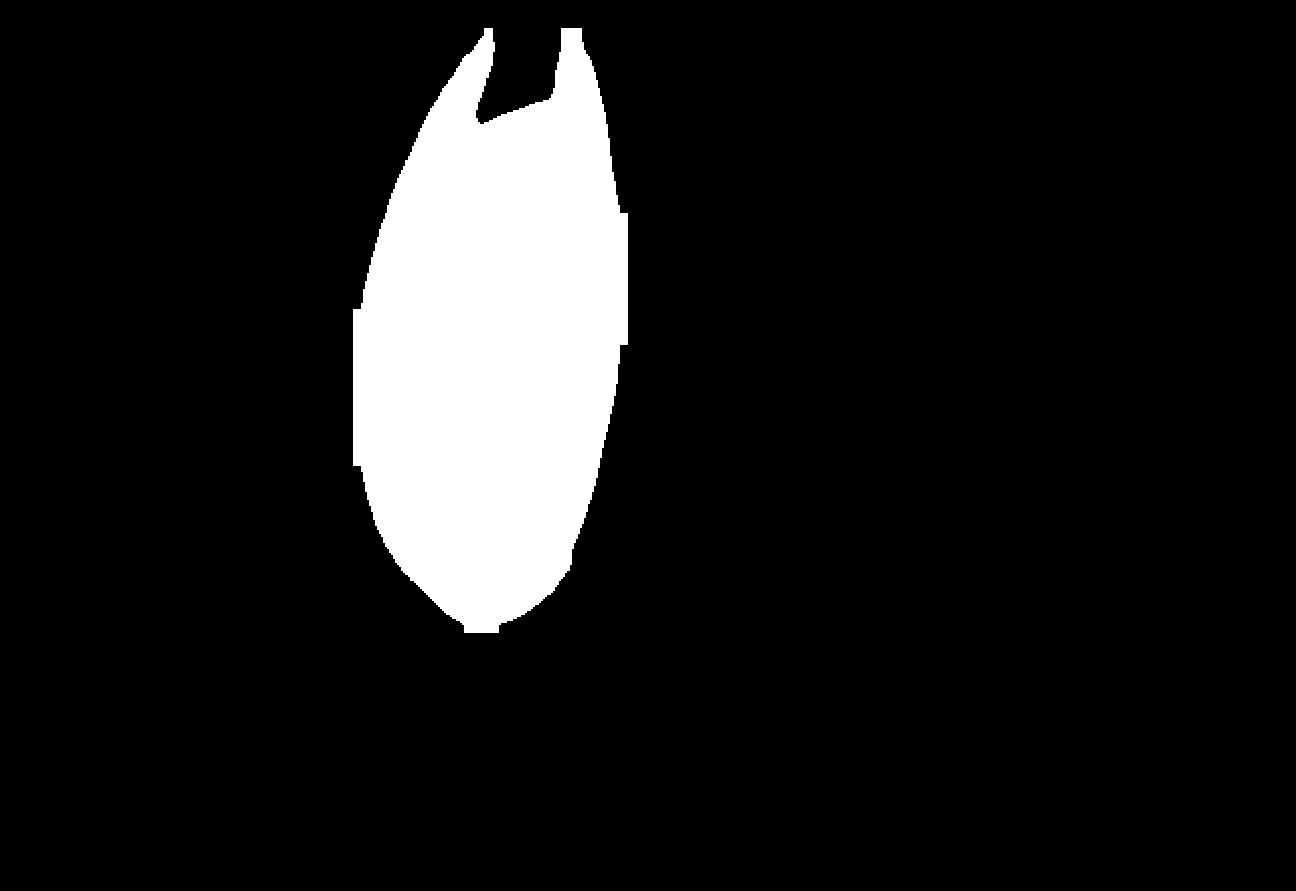

In [262]:
Image.fromarray(mask_resize)

In [263]:
mask_or = cv2.bitwise_or(mask_resize, edges_bin)

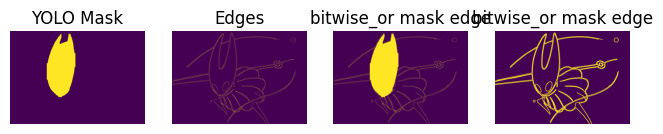

In [284]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask_dil = cv2.dilate(edges_bin, kernel, iterations= 1)

fig, axes = plt.subplots(1,4, figsize=(8,4))

axes[0].imshow(mask_resize)
axes[0].set_title('YOLO Mask')

axes[1].imshow(edges_bin)
axes[1].set_title(f'Edges')

axes[2].imshow(mask_or)
axes[2].set_title(f'bitwise_or mask edge')

axes[3].imshow(mask_dil)
axes[3].set_title(f'bitwise_or mask edge')

for ax in axes:
    ax.axis('OFF')

plt.show()